### Question 1

Implement Perceptron algorithm in Python from scratch on the datasets uploaded in Moodle.

1. Find the decision boundary using Perceptron algorithm on training data and plot it.
2. Classify test data and plot the classification results.
3. Plot the loss vs iteration curve, classification error vs iteration curve, classification accuracy vs iteration curve for training data and report your observations.
4. Find the classification accuracy, the number of true positives, true negatives, false positives and false negatives for both training and test data.
5. Observe the weights obtained and the features of the dataset and report your findings.

In [1]:
# imports and configurations
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (20,10)

data_dir = "./Datasets-Question1"
tr_data_str = "./Datasets-Question1/dataset{}/Train{}.csv"
ts_data_str = "./Datasets-Question1/dataset{}/Test{}.csv"
output_dir = "./output/question1"

num_dataset = len(next(os.walk(data_dir))[1])

features = ["x", "y"]
color = ["red", "blue"]
marker = [".", "+"]

max_itr = 100000

In [2]:
# utility function
def get_y(x, w):
    return -1 * (w[0] + w[1]*x) / w[2]

========= D A T A S E T 1 =========
Training data file: ./Datasets-Question1/dataset1/Train1.csv
Test data file: ./Datasets-Question1/dataset1/Test1.csv
Normalized weights at convergence is [-0.99544772  0.02348007  0.09237166]
Count: 240
Misclassified: 0
Accuracy: 100.0%


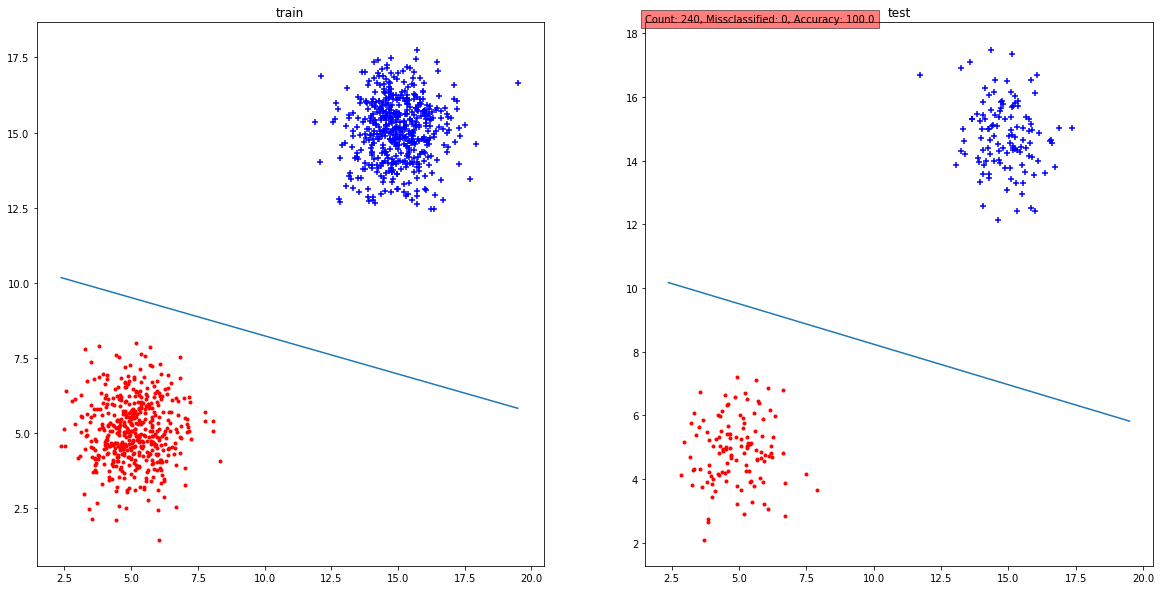

========= D A T A S E T 2 =========
Training data file: ./Datasets-Question1/dataset2/Train2.csv
Test data file: ./Datasets-Question1/dataset2/Test2.csv
Normalized weights at convergence is [-0.99598613  0.08074841  0.0386177 ]
Count: 240
Misclassified: 0
Accuracy: 100.0%


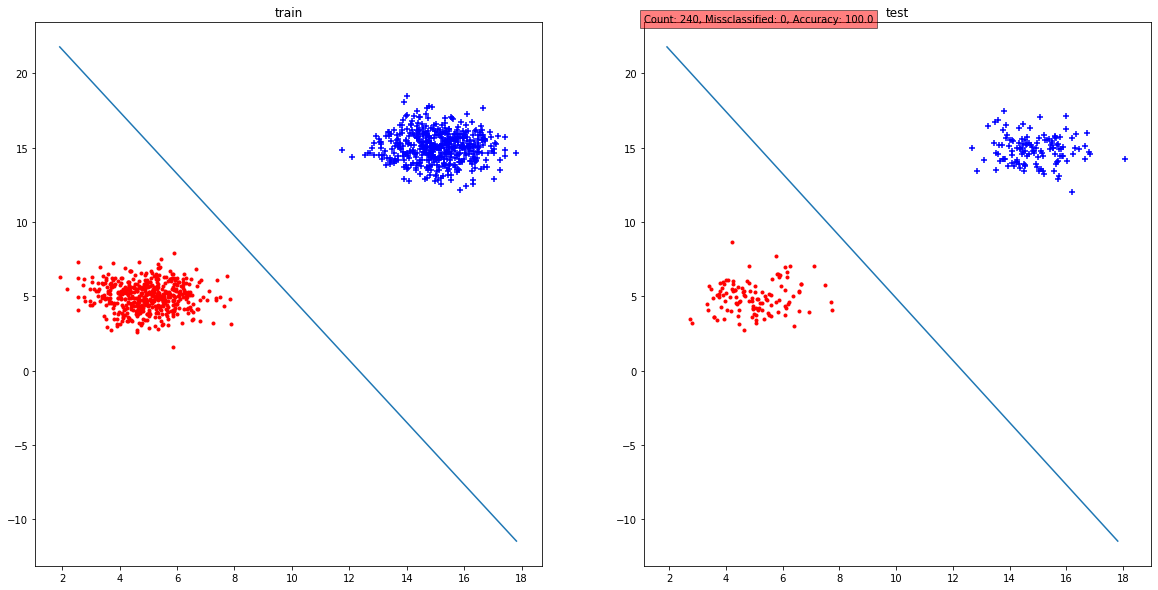

========= D A T A S E T 3 =========
Training data file: ./Datasets-Question1/dataset3/Train3.csv
Test data file: ./Datasets-Question1/dataset3/Test3.csv
Normalized weights at convergence is [ 0.61738135  0.46871079 -0.63178356]
Count: 240
Misclassified: 2
Accuracy: 99.17%


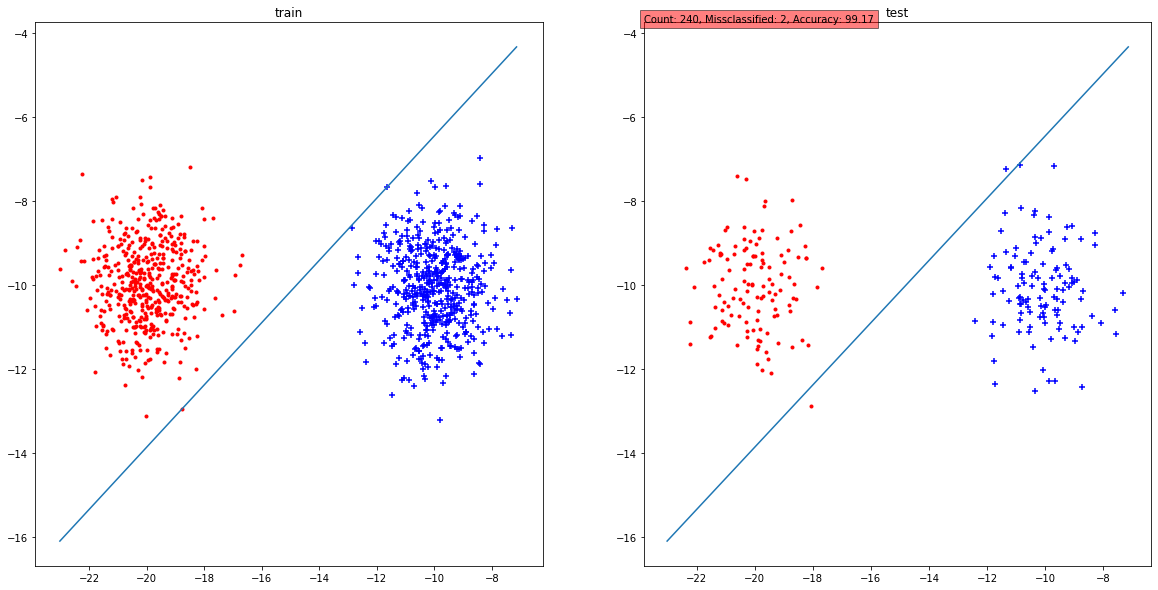

========= D A T A S E T 4 =========
Training data file: ./Datasets-Question1/dataset4/Train4.csv
Test data file: ./Datasets-Question1/dataset4/Test4.csv
Normalized weights at convergence is [-0.10599593 -0.98950114  0.09824645]
Count: 240
Misclassified: 41
Accuracy: 82.92%


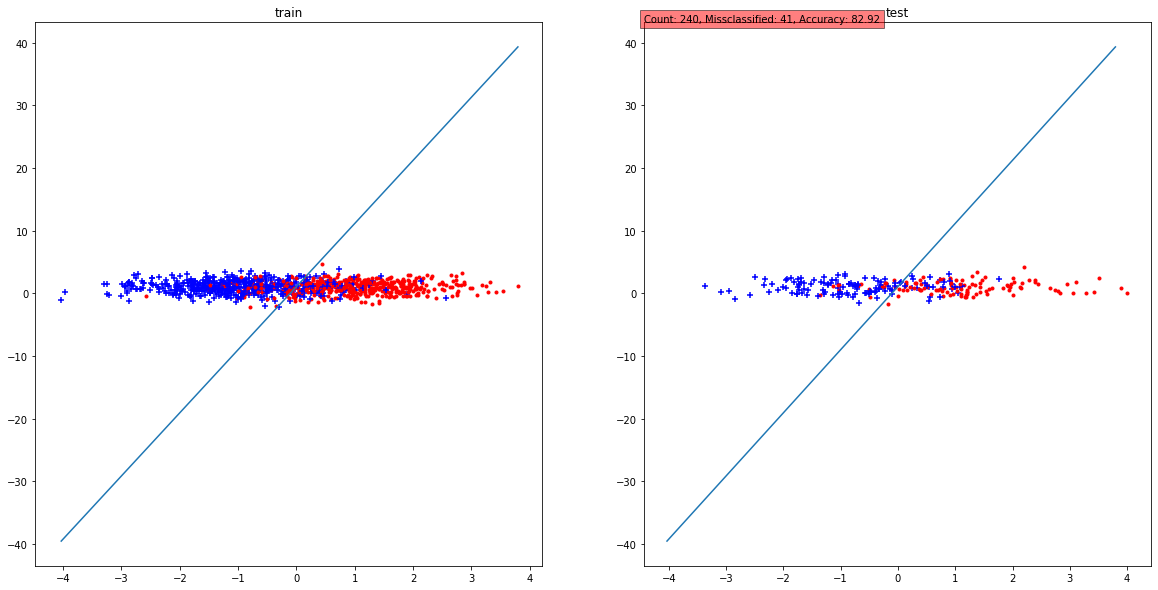

========= D A T A S E T 5 =========
Training data file: ./Datasets-Question1/dataset5/Train5.csv
Test data file: ./Datasets-Question1/dataset5/Test5.csv
Normalized weights at convergence is [0.39796756 0.25812402 0.88033733]
Count: 240
Misclassified: 0
Accuracy: 100.0%


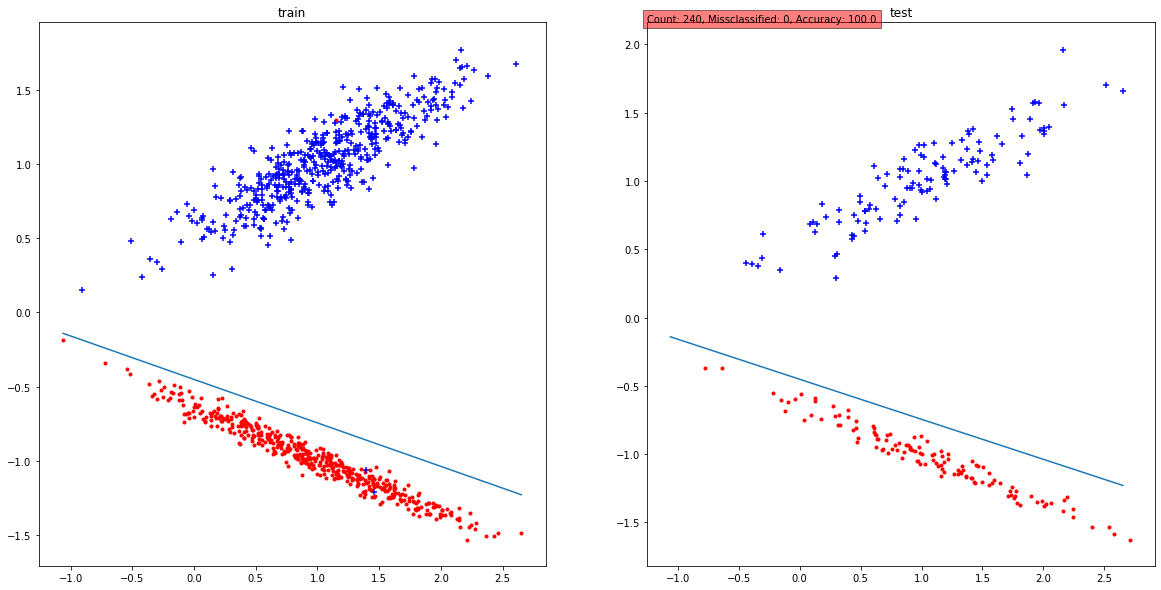

========= D A T A S E T 6 =========
Training data file: ./Datasets-Question1/dataset6/Train6.csv
Test data file: ./Datasets-Question1/dataset6/Test6.csv
Normalized weights at convergence is [ 0.71748842  0.68669366 -0.11688531]
Count: 240
Misclassified: 117
Accuracy: 51.25%


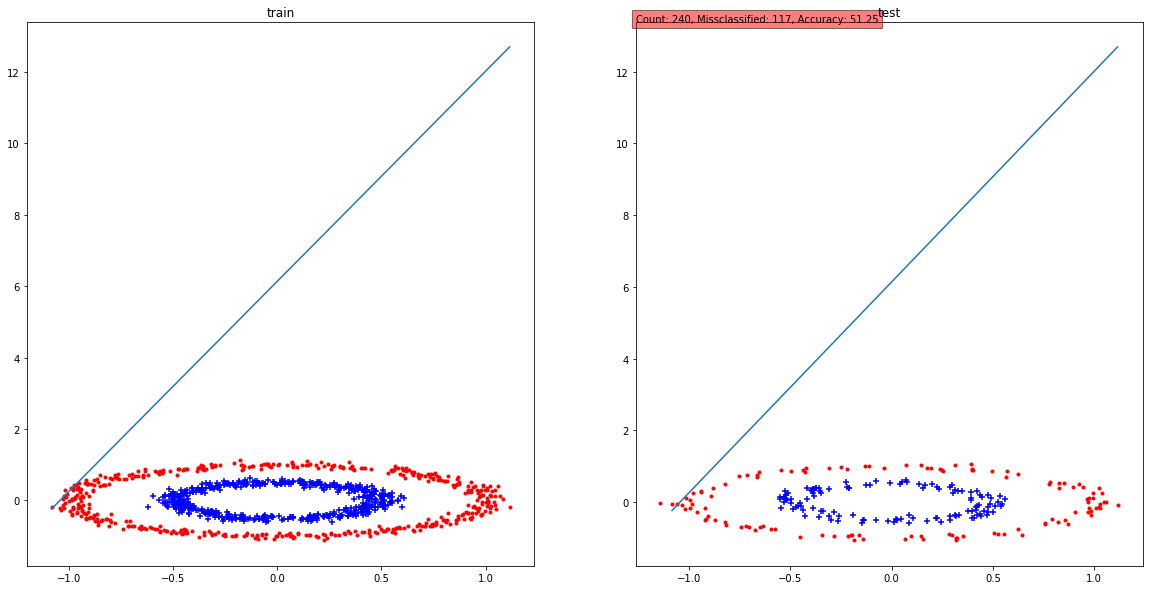

========= D A T A S E T 7 =========
Training data file: ./Datasets-Question1/dataset7/Train7.csv
Test data file: ./Datasets-Question1/dataset7/Test7.csv
Normalized weights at convergence is [ 0.03409094  0.05553258 -0.99787471]
Count: 200
Misclassified: 24
Accuracy: 88.0%


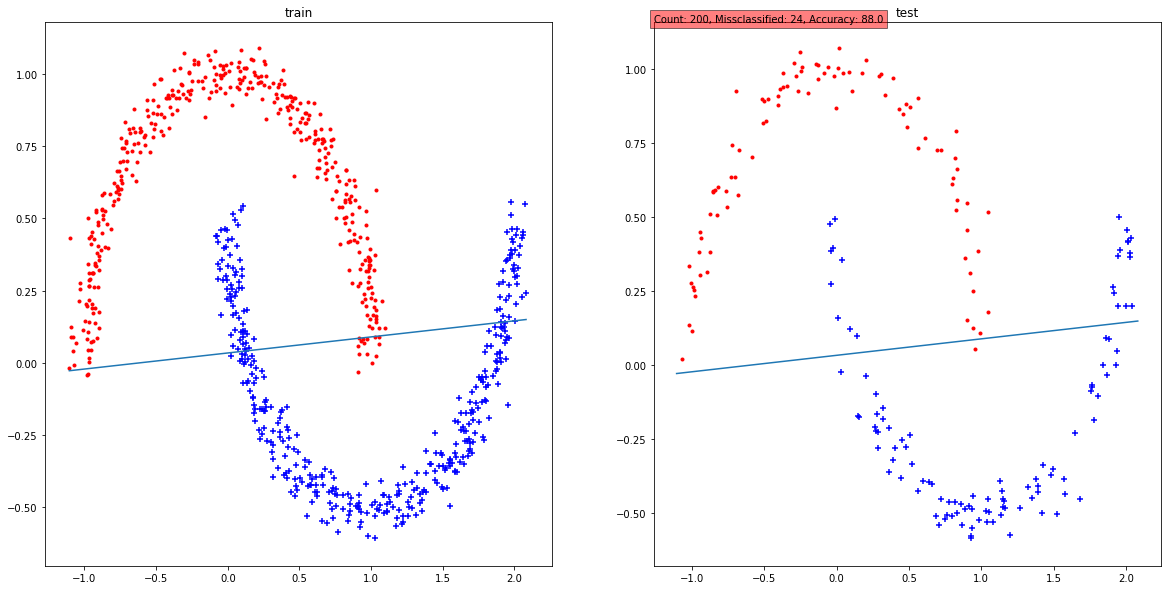

In [3]:
# list for 0-1 loss for all datasets
zero_one_loss = [[] for i in range(num_dataset)]
itr_num = [[] for i in range(num_dataset)]
count_misclassified = [[] for i in range(num_dataset)]
tr_confusion_matrix = []
ts_confusion_matrix = []
weights = []

for i in range(num_dataset):
    tr_data_file = tr_data_str.format(i+1, i+1)
    ts_data_file = ts_data_str.format(i+1, i+1)

    print("========= D A T A S E T {} =========".format(i+1))
    print("Training data file: {}".format(tr_data_file))
    print("Test data file: {}".format(ts_data_file))

    # Reading the data from the file
    tr_df = pd.read_csv(tr_data_file, header=None)
    ts_df = pd.read_csv(ts_data_file, header=None)

    # Converting into numpy array
    tr_labels = tr_df[2].add(0.1).astype(np.int).to_numpy()
    tr_data = tr_df[[0, 1]].to_numpy()

    ts_labels = ts_df[2].add(0.1).astype(np.int).to_numpy()
    ts_data = ts_df[[0, 1]].to_numpy()

    # Augmenting the data and mapping labels {0, 1} to {-1, +1}
    X = np.hstack((np.ones(tr_data.shape[0]).reshape(-1, 1), tr_data))
    Y = tr_labels * 2 - 1

    X_test = np.hstack((np.ones(ts_data.shape[0]).reshape(-1, 1), ts_data))
    Y_test = ts_labels * 2 - 1

    # Weights initialization W = [w0, w1, w2]
    W = np.ones(X.shape[1], dtype=np.float)

    # Perceptron learning algorithm
    converged = False

    k = 0
    sampling_idx = 1
    while k < max_itr and not converged:
        Z = np.multiply(np.dot(X, W), Y)
        
        idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
        if k == sampling_idx:
            sampling_idx *= 2
            zero_one_loss[i].append(idx_misclassified.shape[0] / Z.shape[0])
            count_misclassified[i].append(idx_misclassified.shape[0])
            itr_num[i].append(k)
            
        converged = True
        for j in idx_misclassified:
            W = W + Y[j] * X[j]
            converged = False
        k += 1
    
    norm_W = W / np.linalg.norm(W)
    print("Normalized weights at convergence is {}".format(norm_W))
    
    weights.append(norm_W)

    # final loss
    Z = np.multiply(np.dot(X,W), Y)
    idx_misclassified = np.argwhere(Z <= 0).reshape(-1)
    zero_one_loss[i].append(idx_misclassified.shape[0] / Z.shape[0])
    count_misclassified[i].append(idx_misclassified.shape[0])
    itr_num[i].append(k)
    
    # building confusion matrix for train data
    Y_pred = np.dot(X,W)
    Y_Y_pred = np.multiply(Y, Y_pred)
    true_idx = np.where(Y_Y_pred > 0)
    neg_idx = np.where(Y_Y_pred < 0)
    tp = np.where(Y[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
    fp = np.where(Y[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
    fn = np.where(Y[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
    tn = np.where(Y[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
    tr_conf_mat = np.array([[tp, fp], [fn, tn]])
    

    # building confusion matrix for test data
    Y_pred = np.dot(X_test,W)
    Y_Y_pred = np.multiply(Y_test, Y_pred)
    true_idx = np.where(Y_Y_pred > 0)
    neg_idx = np.where(Y_Y_pred < 0)
    tp = np.where(Y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] > 0)[0].shape[0]
    fp = np.where(Y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] > 0)[0].shape[0]
    fn = np.where(Y_test[neg_idx]*Y_pred[neg_idx]*Y_pred[neg_idx] < 0)[0].shape[0]
    tn = np.where(Y_test[true_idx]*Y_pred[true_idx]*Y_pred[true_idx] < 0)[0].shape[0]
    ts_conf_mat = np.array([[tp, fp], [fn, tn]])

    tr_confusion_matrix.append(tr_conf_mat)
    ts_confusion_matrix.append(ts_conf_mat)
    
    # finding accuracy on test data
    Z = np.multiply(np.dot(X_test, W), Y_test)
    num_misclassified = np.argwhere(Z <= 0).reshape(-1).shape[0]
    accuracy = round(100 * (1 - num_misclassified/Y_test.shape[0]),2)

    print("Count: {}\nMisclassified: {}\nAccuracy: {}%"
          .format(Y_test.shape[0], num_misclassified, accuracy))

    # Saving the results
    x_coord = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_coord = [get_y(x, W) for x in x_coord]

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(20, 10)
    
    # plotting training data
    ax[0].set_title('train')
    ax[0].plot(x_coord, y_coord)
    for x, y in zip(tr_data, tr_labels):
        ax[0].scatter(x[0], x[1], c=color[y], marker=marker[y])

    # plotting test data
    ax[1].set_title('test')
    ax[1].plot(x_coord, y_coord)
    for x, y in zip(ts_data, ts_labels):
        ax[1].scatter(x[0], x[1], c=color[y], marker=marker[y])

    ax[1].text(0, 1, "Count: {}, Missclassified: {}, Accuracy: {}"
               .format(Y_test.shape[0], num_misclassified, accuracy),
               bbox=dict(facecolor='red', alpha=0.5),
               transform=ax[1].transAxes)

    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

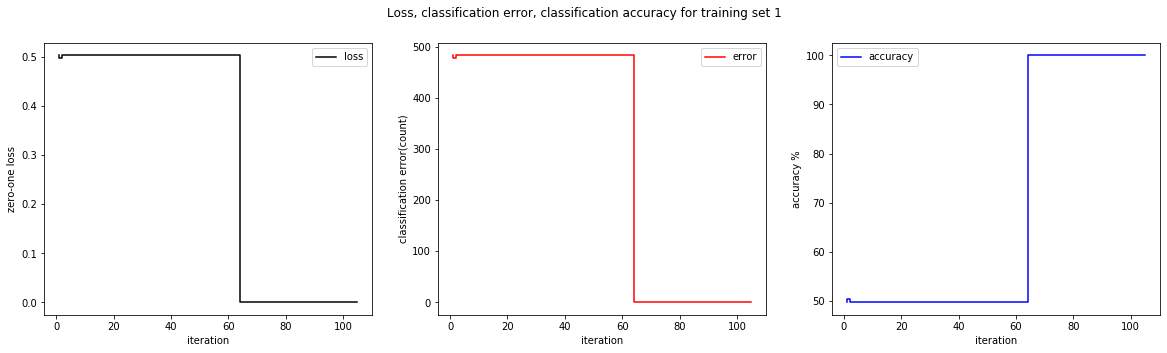

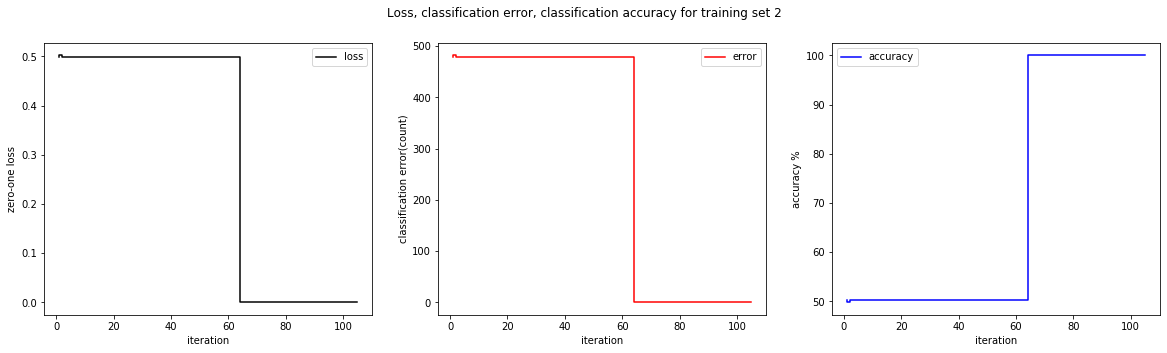

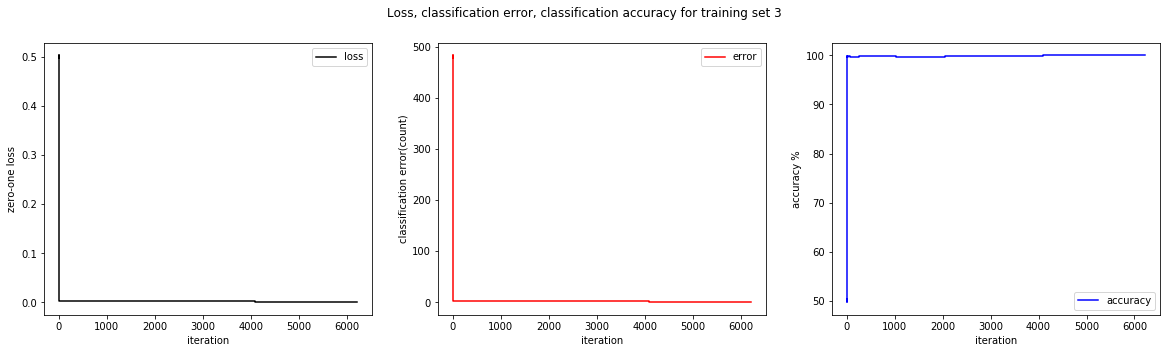

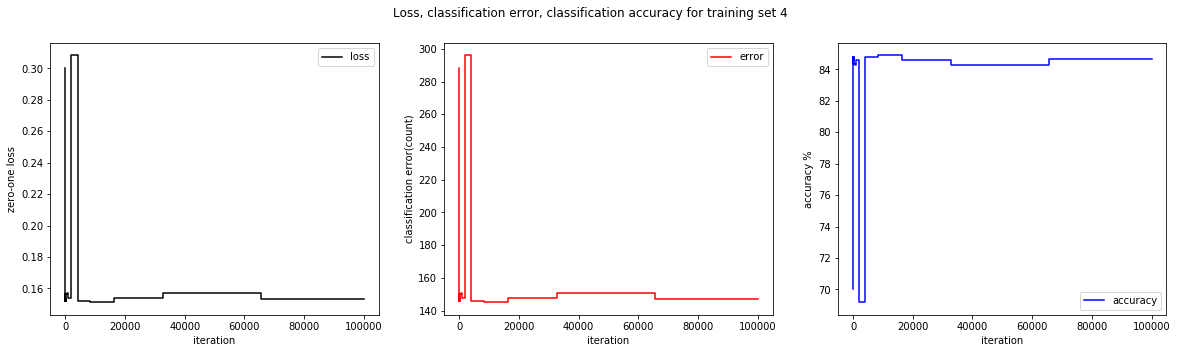

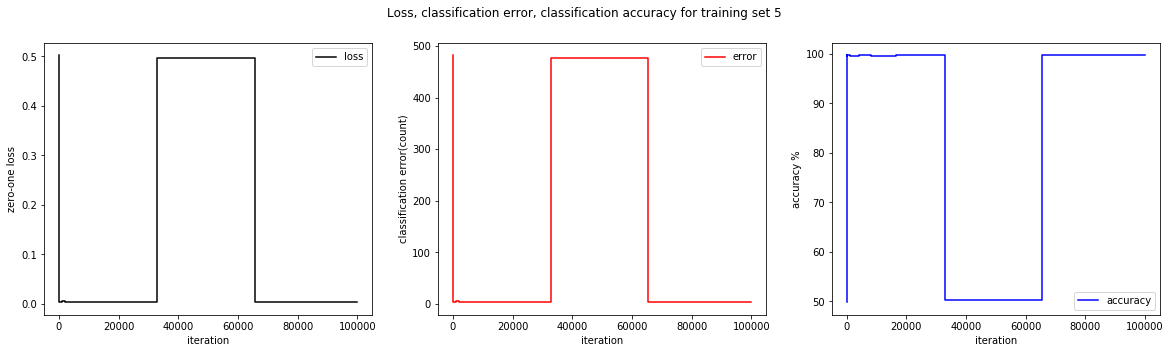

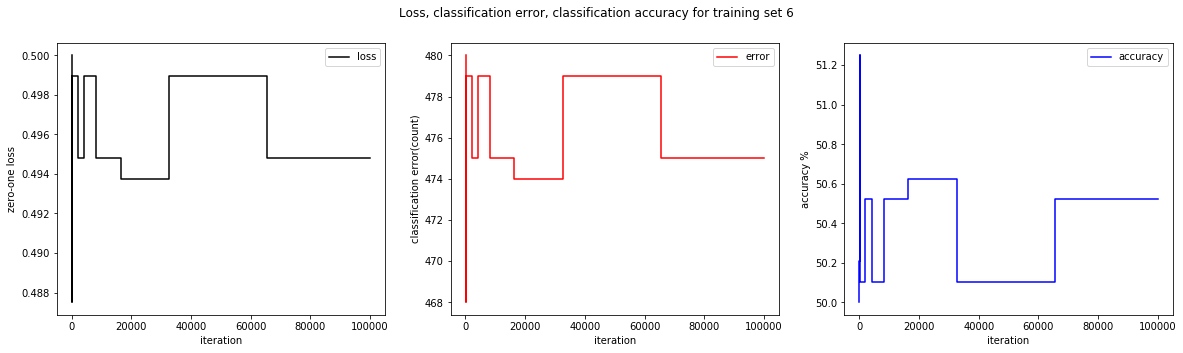

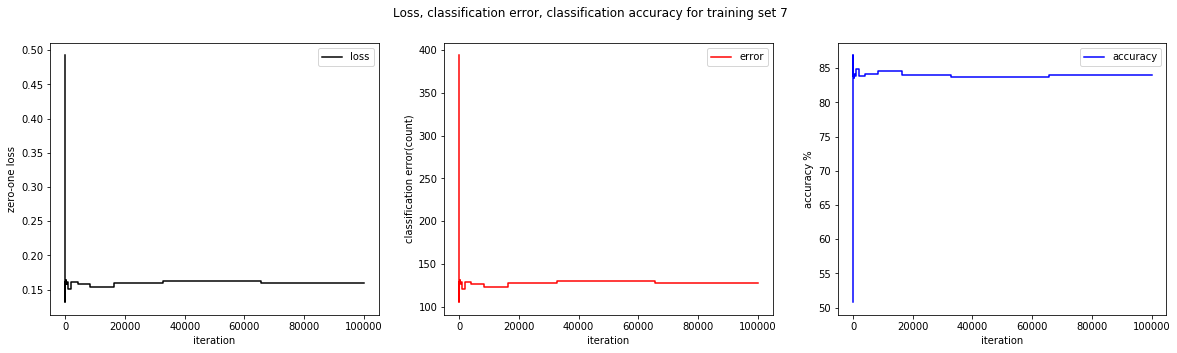

In [4]:
# Results and interpretation
for i in range(num_dataset):
    loss = np.array(zero_one_loss[i])
    error = np.array(count_misclassified[i])
    accuracy_percent = (1-loss)*100
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(20,5)
    fig.suptitle('Loss, classification error, classification accuracy for training set {}'.format(i+1))
    
    ax[0].step(itr_num[i], loss, 'k-', label='loss')
    ax[0].set_ylabel('zero-one loss')
    ax[0].set_xlabel('iteration')
    
    ax[1].step(itr_num[i], error, 'r-', label='error')
    ax[1].set_ylabel('classification error(count)')
    ax[1].set_xlabel('iteration')
    
    ax[2].step(itr_num[i], accuracy_percent, 'b-', label='accuracy')
    ax[2].set_ylabel('accuracy %')
    ax[2].set_xlabel('iteration')
    
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.show()

### Confusion Matrix

True positive: Actual positive, predicted positive

True negative: Actual negative, predicted negative

False positive: Actual negative, predicted positive

False negative: Actual positive, predicted negative

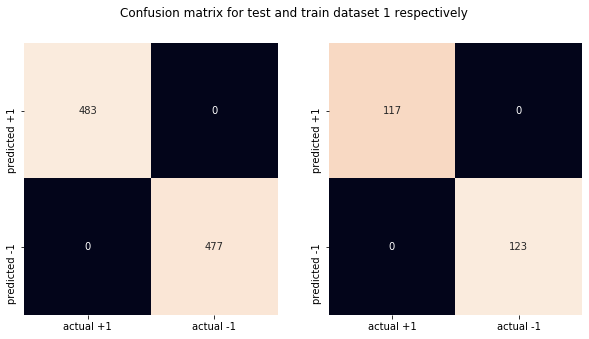

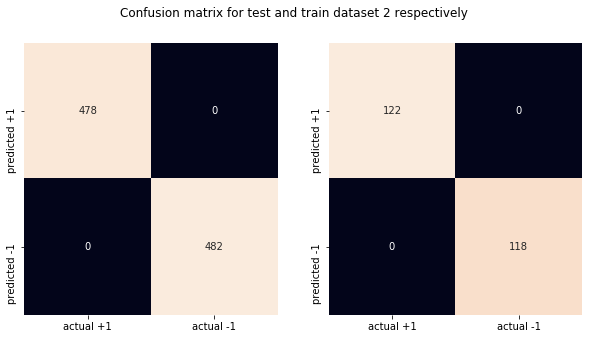

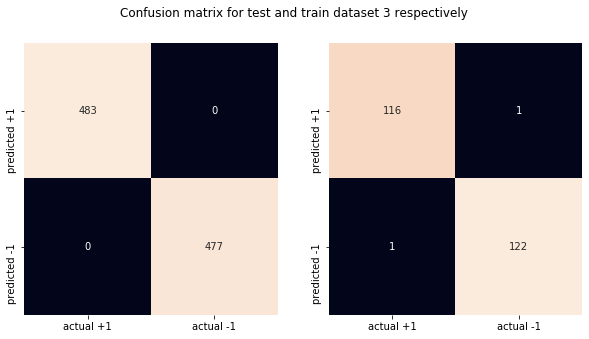

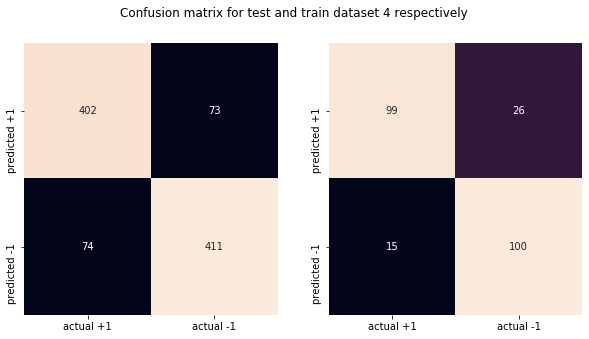

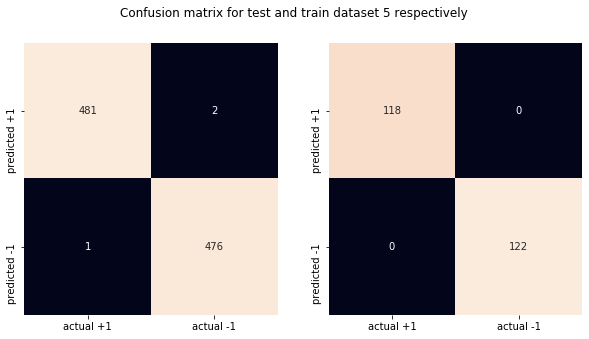

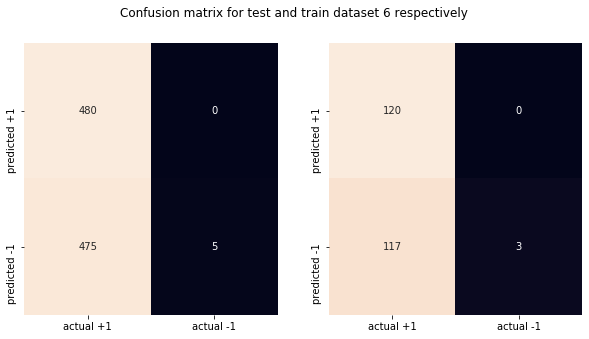

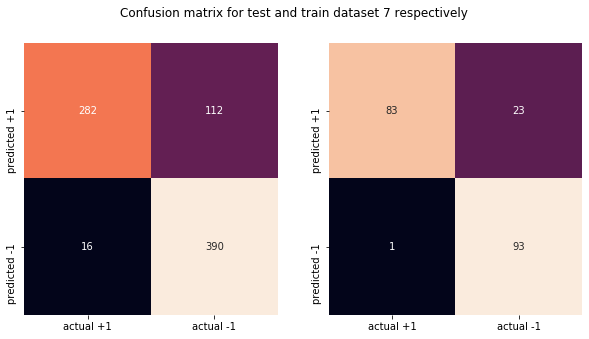

In [5]:
xtick_label = ['actual +1', 'actual -1']
ytick_label = ['predicted +1', 'predicted -1']

for i in range(num_dataset):    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10,5)
    fig.suptitle('Confusion matrix for test and train dataset {} respectively'.format(i+1))
    
    sns.heatmap(tr_confusion_matrix[i], annot=True, ax=ax[0], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)
    sns.heatmap(ts_confusion_matrix[i], annot=True, ax=ax[1], xticklabels=xtick_label, yticklabels=ytick_label, fmt='d', cbar=False)

In [6]:
for i in range(num_dataset):
    print("Normalized weights for dataset {} : {}".format(i+1, weights[i]))

Normalized weights for dataset 1 : [-0.99544772  0.02348007  0.09237166]
Normalized weights for dataset 2 : [-0.99598613  0.08074841  0.0386177 ]
Normalized weights for dataset 3 : [ 0.61738135  0.46871079 -0.63178356]
Normalized weights for dataset 4 : [-0.10599593 -0.98950114  0.09824645]
Normalized weights for dataset 5 : [0.39796756 0.25812402 0.88033733]
Normalized weights for dataset 6 : [ 0.71748842  0.68669366 -0.11688531]
Normalized weights for dataset 7 : [ 0.03409094  0.05553258 -0.99787471]


### Conclusion

Features having positive weights direct the output towards positive class hence impact positive outcome and same goes for negative weights. The magnitude of weights determine the amount of impact a particular features create in governing the output. Hence for the dataset 7 the second feature has a weight of -0.997... which means that positive value for this feature favours negative outcome by a large margin.